<a href="https://colab.research.google.com/github/adi6751/Project-of-group-1/blob/main/Quality_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Load the new dataset
df = pd.read_csv("/content/sample_data/Quality_Concrete.csv")

In [ ]:
df.head()

,Chloride,Label,Organic_Carbon,Solids,Sulfate,Turbidity,ph
0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521


In [ ]:
print(df.shape)

(10000, 7)


In [ ]:
print(df.columns)

Index(['Chloride', 'Label', 'Organic_Carbon', 'Solids', 'Sulfate', 'Turbidity',
       'ph'],
      dtype='object')


In [ ]:
df.describe()

,Chloride,Label,Organic_Carbon,Solids,Sulfate,Turbidity,ph
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3209.816032,0.349000,289.310908,4706.413051,446.180194,2805.481180,6.992082
std,1963.715379,0.476678,164.697936,3620.078892,222.009852,1757.869279,2.868269
min,500.007896,0.000000,50.002808,502.309068,20.260550,11.057664,2.000041
25%,1454.537607,0.000000,142.031853,1434.354000,264.214909,1238.594183,4.525121
50%,2849.755448,0.000000,265.943550,3600.772034,467.254435,2686.578239,6.962148
75%,4935.833784,1.000000,435.807178,7905.844100,636.283529,4344.418741,9.458439
max,6999.595374,1.000000,599.906575,11999.407530,799.961446,5999.019634,11.999440


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Chloride        10000 non-null  float64
 1   Label           10000 non-null  int64  
 2   Organic_Carbon  10000 non-null  float64
 3   Solids          10000 non-null  float64
 4   Sulfate         10000 non-null  float64
 5   Turbidity       10000 non-null  float64
 6   ph              10000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


In [ ]:
print(df.nunique())

Chloride          8000
Label                2
Organic_Carbon    8000
Solids            8000
Sulfate           8000
Turbidity         8000
ph                8000
dtype: int64


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# Rename columns for consistency
df = df.rename(columns={'Sulphate': 'Sulfate'})

In [ ]:
# Check for missing values
print(df.isnull().sum())

Chloride          0
Label             0
Organic_Carbon    0
Solids            0
Sulfate           0
Turbidity         0
ph                0
dtype: int64


In [ ]:
# Define features and target
X = df.drop(columns=['Label'])
y = df['Label']


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
# Logistic Regression
model_lg = LogisticRegression(max_iter=120, random_state=0, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lg))
print(classification_report(y_test, pred_lg))

Logistic Regression Accuracy: 0.8566666666666667
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2137
           1       0.76      0.87      0.81      1163

    accuracy                           0.86      3300
   macro avg       0.84      0.86      0.85      3300
weighted avg       0.87      0.86      0.86      3300



In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

Decision Tree Accuracy: 0.8548484848484849
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2137
           1       0.76      0.87      0.81      1163

    accuracy                           0.85      3300
   macro avg       0.84      0.86      0.85      3300
weighted avg       0.86      0.85      0.86      3300



In [ ]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest Accuracy: 0.8566666666666667
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2137
           1       0.76      0.87      0.81      1163

    accuracy                           0.86      3300
   macro avg       0.84      0.86      0.85      3300
weighted avg       0.87      0.86      0.86      3300



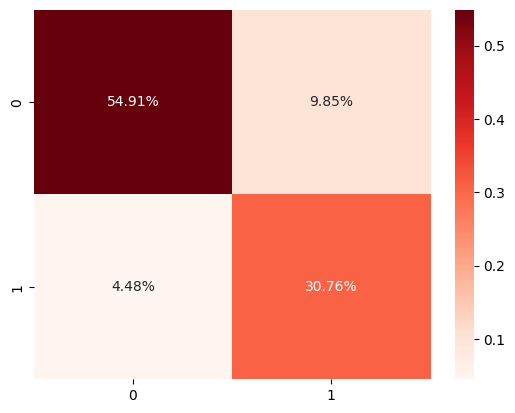

In [ ]:
# Confusion matrix for visualization
sns.heatmap(confusion_matrix(y_test, pred_rf)/np.sum(confusion_matrix(y_test, pred_rf)), annot=True, fmt='0.2%', cmap='Reds')
plt.show()